<a href="https://colab.research.google.com/github/kutluhanNG/MachineLearning/blob/main/Stacked_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you put more than one hidden layer in an autoencoder it becomes an stacked autoencoder or deep autoencoder. Below is an Implementation of a Stacked Autoencoder Using Keras:

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_valid.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 48000
Validation samples: 12000
Test samples: 10000


In [3]:
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu')
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(784),
    tf.keras.layers.Reshape([28,28])
])

stacked_autoencoder = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_autoencoder.compile(loss='mse', optimizer='nadam')
history = stacked_autoencoder.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0363 - val_loss: 0.0184
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0179 - val_loss: 0.0169
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0161 - val_loss: 0.0158
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 12/20
1500/1500 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


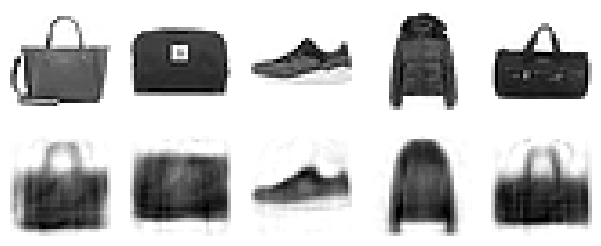

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_reconstruction(model, images=X_valid, n_images=5):
  reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plt.imshow(images[image_index], cmap="binary")
    plt.axis("off")
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plt.imshow(reconstructions[image_index], cmap = "binary")
    plt.axis("off")

plot_reconstruction(stacked_autoencoder)
plt.show()

**Visualizing the Fashion MNIST Dataset**

Now that we have trained a stacked autoencoder, we can use it to reduce the dataset's dimensionality.
For visualization, this does not give great results compared to other dimensionality reduction algorithms but one big advantage of autoencoders is that they can handle large datasets with many instances and many features. So, one strategy is to use an autoencoder to reduce the dimensionality down to a reasonable level, then use another dimensionality reduction algorithm for visualization.

In [ ]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


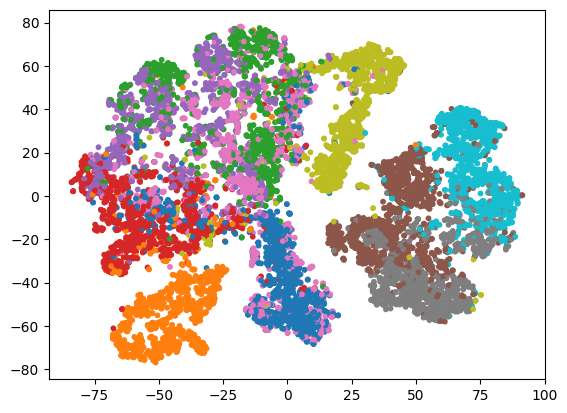

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

**Unsupervised Pretraining Using Stacked Autoencoders**

If you have a lot of data but little **labeled data**, you can first train a stacked autoencoder using all the data, then reuse the lower layers to create a neural network for your actual task and train it using the labeled data. *If you do not have much labeled data, you may want to **freeze** the pretrained layers, at least the lower ones.*

One otheer thing is to train one autoencoder at a time. Simply meaning that each autoencoder has **one** hidden layer. We first train primary autoencoder on input data; that autoencoder learns to reconstruct the original data. Then we train a **second autoencoder with one hidden layer** input being as first autoencoders outputs. If you do this process over and over again and stack the individual autoencoders together, you will get a very deep autoencoder.

## Convolutional Autoencoders ##

If you want to build an autoencoder for images you will need to build a *convolutional autoencoder*. The encoder is a regular CNN composed of convolutional layers and pooling layers. It typically reduces the spatial dimensionality of the inputs while increasing the depth. The decoder must do the reverse; *upscale the image and reduce its depth back to the normal and for this you can use transpose convolutional layers.

In [4]:
conv_encoder = tf.keras.Sequential([
  tf.keras.layers.Reshape([28, 28, 1]),
  tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
  tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
  tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),  # output: 3 × 3 x 64
  tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
  tf.keras.layers.GlobalAvgPool2D()  # output: 30
 ])
conv_decoder = tf.keras.Sequential([
  tf.keras.layers.Dense(3 * 3 * 16),
  tf.keras.layers.Reshape((3, 3, 16)),
  tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
  tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu"),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
  tf.keras.layers.Reshape([28, 28])
])

conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])